## JURNAL PCD MODUL 2 ( EKUALISASI dan SPESIFIKASI HISTOGRAM)

# Import Library 

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg
import cv2 as cv
import pandas as pd

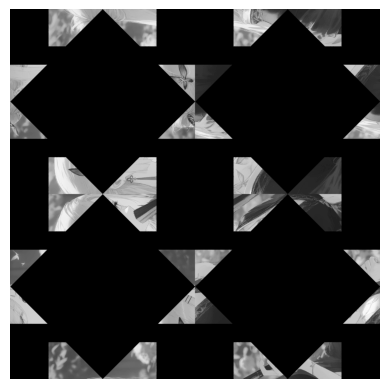

In [3]:
img_1 = plt.imread("Res/senheScramble.jpg") 
plt.imshow(img_1, cmap='gray')
plt.axis("off")
plt.show()

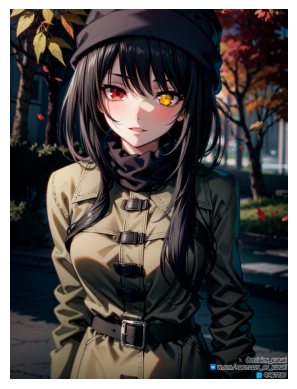

In [4]:
img_2 = plt.imread("Res/kurumi.jpg") 
plt.imshow(img_2)
plt.axis("off")
plt.show()

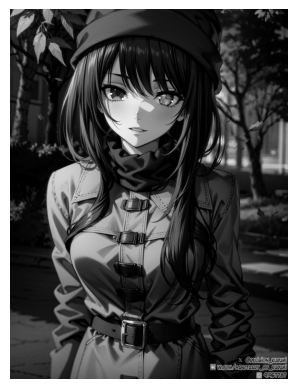

In [5]:
gray_img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY) #4
plt.imshow(gray_img_2, cmap='gray')
height_2, width_2 = gray_img_2.shape
plt.axis("off")
plt.show()

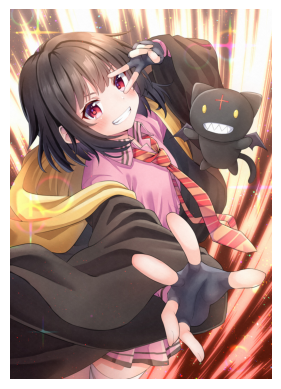

In [6]:
img_3 = plt.imread("Res/megumin.jpg") #5
plt.imshow(img_3)
plt.axis("off")
plt.show()

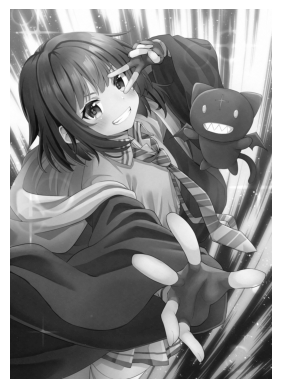

In [7]:
gray_img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2GRAY) #6
plt.imshow(gray_img_3, cmap='gray')
height_3, width_3 = gray_img_3.shape
plt.axis("off")
plt.show()